<h1> Instalando los pip </h1>

In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1> Importar dataset </h1>

In [ ]:
from medmnist import PneumoniaMNIST

datasetval = PneumoniaMNIST(split="val", download=True)
datasettest = PneumoniaMNIST(split="test", download=True)
datasettrain = PneumoniaMNIST(split="train", download=True)

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


<h2> Revisamos que contiene el dataset

In [ ]:
datasetval

Dataset PneumoniaMNIST (pneumoniamnist)
    Number of datapoints: 524
    Root location: /root/.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

<h2> Ingresamos las imagenes en listas vacias

In [ ]:
import cv2

resized_imagetrain = []
resized_imagetest = []
resized_imageval = []


for i in range(len(datasettrain)):
  image = cv2.resize(datasettrain.imgs[i], (32,32))
  rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
  resized_imagetrain.append(rgb_image)

for i in range(len(datasettest)):
  image = cv2.resize(datasettest.imgs[i], (32,32))
  rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
  resized_imagetest.append(rgb_image)

for i in range(len(datasetval)):
  image = cv2.resize(datasetval.imgs[i], (32,32))
  rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
  resized_imageval.append(rgb_image)

<h2> Mostramos  las imagenes

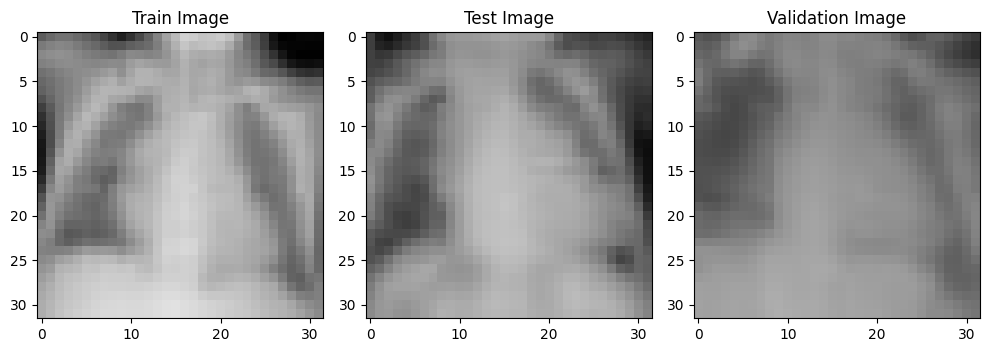

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axes[0].imshow(resized_imagetrain[0], cmap="gray")
axes[0].set_title("Train Image")
axes[1].imshow(resized_imagetest[0], cmap="gray")
axes[1].set_title("Test Image")
axes[2].imshow(resized_imageval[0], cmap="gray")
axes[2].set_title("Validation Image")

plt.tight_layout()

plt.show()

In [ ]:
print(resized_imagetrain[0].shape)
print(resized_imagetest[0].shape)
print(resized_imageval[0].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [ ]:
import numpy as np

resized_imagetrain = np.array(resized_imagetrain)
resized_imagetest = np.array(resized_imagetest)
resized_imageval = np.array(resized_imageval)

<h2>Importamos los pesos

In [ ]:
from keras import *
from keras.layers import *
from keras.applications import *
from keras.layers import Dense
import keras.models

base_model = VGG16(include_top=False, weights="imagenet", input_shape=(32,32,3))
base_model.trainable=False

flatten = layers.Flatten();
dense_layer1 = layers.Dense(5, activation="relu");
output_layer = layers.Dense(1, activation="sigmoid");

model = models.Sequential([
    base_model,
    flatten,
    dense_layer1,
    output_layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,717,259
Trainable params: 2,571
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
history = model.fit(resized_imagetrain, datasettrain.labels, epochs=20, batch_size = 128, validation_data=(resized_imagetest, datasettest.labels));

Epoch 1/20
37/37 [==============================] - 13s 146ms/step - loss: 1.5859 - accuracy: 0.7124 - recall: 0.7931 - val_loss: 0.5363 - val_accuracy: 0.7676 - val_recall: 0.9513
Epoch 2/20
37/37 [==============================] - 1s 26ms/step - loss: 0.3614 - accuracy: 0.8267 - recall: 0.9722 - val_loss: 0.5092 - val_accuracy: 0.7596 - val_recall: 0.9897
Epoch 3/20
37/37 [==============================] - 1s 25ms/step - loss: 0.2986 - accuracy: 0.8333 - recall: 0.9845 - val_loss: 0.4788 - val_accuracy: 0.7772 - val_recall: 0.9949
Epoch 4/20
37/37 [==============================] - 1s 24ms/step - loss: 0.2621 - accuracy: 0.8900 - recall: 0.9482 - val_loss: 0.4716 - val_accuracy: 0.8494 - val_recall: 0.9436
Epoch 5/20
37/37 [==============================] - 1s 20ms/step - loss: 0.2333 - accuracy: 0.9191 - recall: 0.9482 - val_loss: 0.4757 - val_accuracy: 0.8413 - val_recall: 0.9462
Epoch 6/20
37/37 [==============================] - 1s 22ms/step - loss: 0.2109 - accuracy: 0.9267 - re

In [ ]:
yhat_probs = model.predict(resized_imagetest)

20/20 [==============================] - 1s 20ms/step


In [ ]:
for i in range(len(yhat_probs)):
  if (yhat_probs[i] >= 0.7):
    yhat_probs[i] = 1
  else:
    yhat_probs[i] = 0

In [ ]:
for i in range(20):
    prediccion = yhat_probs[i]
    valor_real = datasettest.labels[i]
    print("Predicción:", prediccion, "Valor Real:", valor_real)

Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [0]


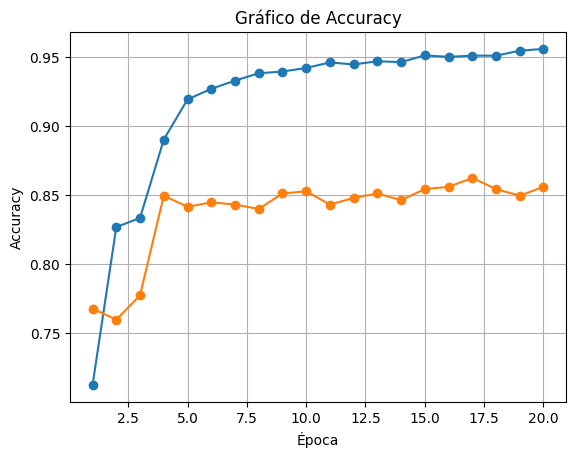

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Número de épocas o iteraciones
epochs = len(train_accuracy)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, train_accuracy, marker='o')
plt.plot(x, val_accuracy, marker='o')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('Accuracy')

# Título del gráfico
plt.title('Gráfico de Accuracy')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

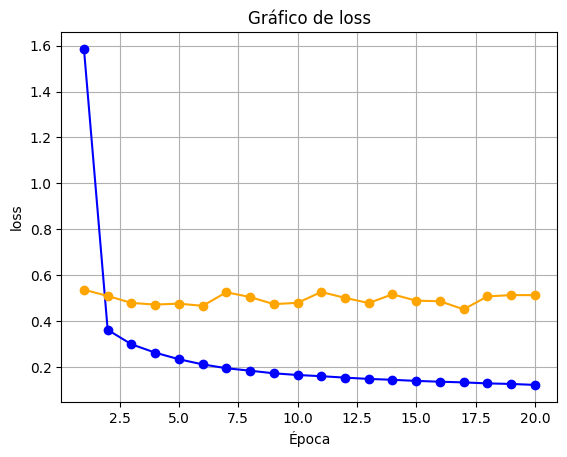

In [ ]:
loss = history.history['loss']
loss_val = history.history['val_loss']
# Número de épocas o iteraciones
epochs = len(loss)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, loss, marker='o', color='blue')
plt.plot(x, loss_val, marker='o', color='orange')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('loss')

# Título del gráfico
plt.title('Gráfico de loss')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

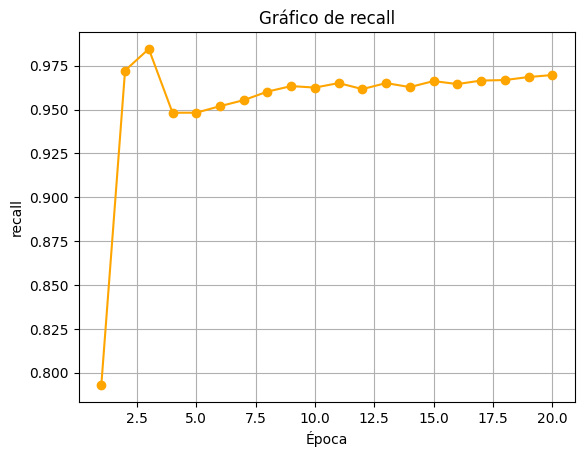

In [ ]:
recall_history = history.history['recall']
# Número de épocas o iteraciones
epochs = len(recall_history)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, recall_history, marker='o', color='orange')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('recall')

# Título del gráfico
plt.title('Gráfico de recall')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

<h1> Matriz de confusión, f1-score, accuracy, precision, recall

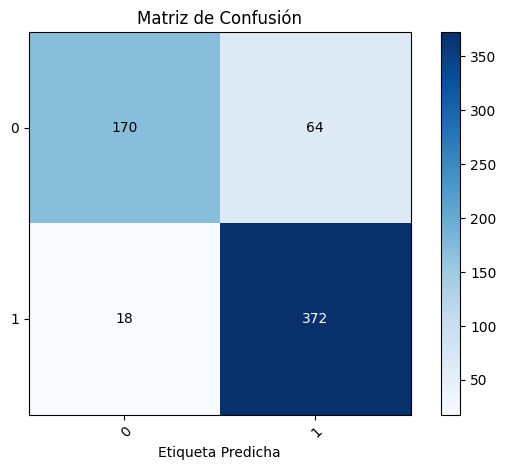

Precisión (Accuracy): 0.8685897435897436
Precisión: 0.8532110091743119
Recall: 0.9538461538461539
Puntuación F1: 0.9007263922518159


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.multiclass import unique_labels

# Obtén las predicciones del modelo para tus datos de prueba
y_true = datasettest.labels # Etiquetas verdaderas
y_pred = yhat_probs  # Etiquetas predichas por el modelo

# Calcula la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Obtiene las clases únicas
classes = unique_labels(y_true, y_pred)

# Visualiza la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Matriz de Confusión',
       xlabel='Etiqueta Predicha')

# Rota las etiquetas en el eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Itera sobre los datos de la matriz y agrega anotaciones
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Ajusta el espaciado para evitar recortar las etiquetas
fig.tight_layout()
plt.show()

#Precision, Recall, F1
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print("Precisión (Accuracy):", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)

<h1> Fine-tuning descongelando las primeras 5 capas

In [ ]:
base_modeldos = VGG16(include_top=False, weights="imagenet", input_shape=(32,32,3))
base_modeldos.trainable=False
#Agregar 2 capas ocultas de 100 y 200 mas una capa oculta con softmax

for layer in base_modeldos.layers[-5:]:
    layer.trainable = True


flatten = layers.Flatten();
dense_layer1 = layers.Dense(5, activation="relu");
output_layer = layers.Dense(1, activation="sigmoid");

modeldos = models.Sequential([
    base_modeldos,
    flatten,
    dense_layer1,
    output_layer
])

modeldos.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,717,259
Trainable params: 2,571
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
for layer in base_modeldos.layers:
    if layer.trainable:
        print(f"Capa {layer.name} está descongelada")
    else:
        print(f"Capa {layer.name} está congelada")

Capa input_2 está congelada
Capa block1_conv1 está congelada
Capa block1_conv2 está congelada
Capa block1_pool está congelada
Capa block2_conv1 está congelada
Capa block2_conv2 está congelada
Capa block2_pool está congelada
Capa block3_conv1 está congelada
Capa block3_conv2 está congelada
Capa block3_conv3 está congelada
Capa block3_pool está congelada
Capa block4_conv1 está congelada
Capa block4_conv2 está congelada
Capa block4_conv3 está congelada
Capa block4_pool está descongelada
Capa block5_conv1 está descongelada
Capa block5_conv2 está descongelada
Capa block5_conv3 está descongelada
Capa block5_pool está descongelada


In [ ]:
base_modeldos.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
modeldos.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
historydos = modeldos.fit(resized_imagetrain, datasettrain.labels, epochs=20, validation_data=(resized_imagetest, datasettest.labels));

Epoch 1/20
148/148 [==============================] - 4s 15ms/step - loss: 0.4541 - accuracy: 0.8411 - recall: 0.8852 - val_loss: 0.4727 - val_accuracy: 0.8221 - val_recall: 0.9718
Epoch 2/20
148/148 [==============================] - 2s 11ms/step - loss: 0.1925 - accuracy: 0.9212 - recall: 0.9508 - val_loss: 0.3829 - val_accuracy: 0.8494 - val_recall: 0.9692
Epoch 3/20
148/148 [==============================] - 2s 11ms/step - loss: 0.1581 - accuracy: 0.9388 - recall: 0.9659 - val_loss: 0.3105 - val_accuracy: 0.8814 - val_recall: 0.9590
Epoch 4/20
148/148 [==============================] - 2s 12ms/step - loss: 0.1465 - accuracy: 0.9427 - recall: 0.9648 - val_loss: 0.3434 - val_accuracy: 0.8750 - val_recall: 0.9692
Epoch 5/20
148/148 [==============================] - 2s 12ms/step - loss: 0.1320 - accuracy: 0.9514 - recall: 0.9691 - val_loss: 0.3578 - val_accuracy: 0.8702 - val_recall: 0.9744
Epoch 6/20
148/148 [==============================] - 2s 11ms/step - loss: 0.1268 - accuracy: 0

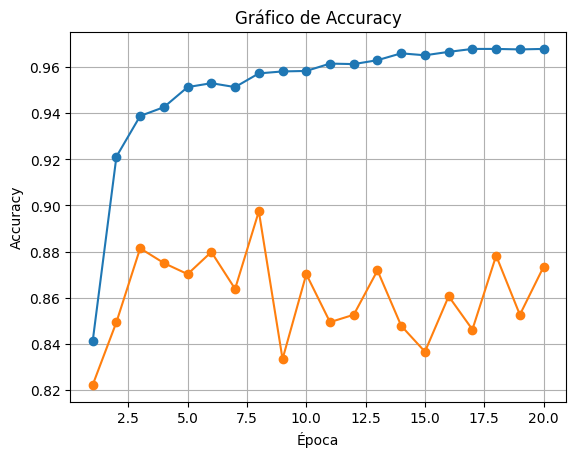

In [ ]:
train_accuracy = historydos.history['accuracy']
val_accuracy = historydos.history['val_accuracy']
# Número de épocas o iteraciones
epochs = len(train_accuracy)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, train_accuracy, marker='o')
plt.plot(x, val_accuracy, marker='o')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('Accuracy')

# Título del gráfico
plt.title('Gráfico de Accuracy')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

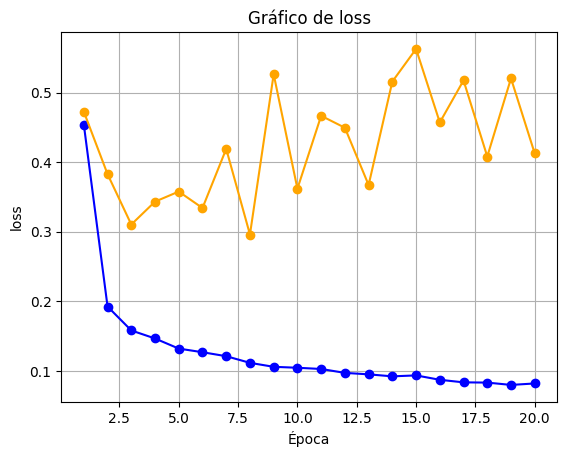

In [ ]:
loss2 = historydos.history['loss']
loss_val2 = historydos.history['val_loss']
# Número de épocas o iteraciones
epochs = len(loss2)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, loss2, marker='o', color='blue')
plt.plot(x, loss_val2, marker='o', color='orange')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('loss')

# Título del gráfico
plt.title('Gráfico de loss')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

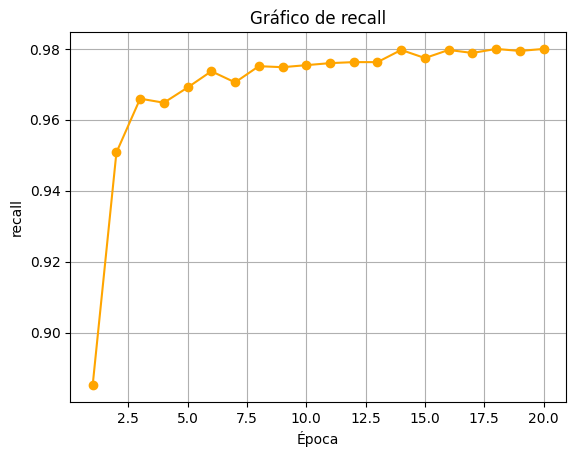

In [ ]:
recall_historydos = historydos.history['recall']
# Número de épocas o iteraciones
epochs = len(recall_history)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, recall_historydos, marker='o', color='orange')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('recall')

# Título del gráfico
plt.title('Gráfico de recall')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
ypredictdos = modeldos.predict(resized_imagetest)

20/20 [==============================] - 0s 6ms/step


In [ ]:
for i in range(len(ypredictdos)):
  if (ypredictdos[i] >= 0.7):
    ypredictdos[i] = 1
  else:
    ypredictdos[i] = 0

In [ ]:
for i in range(20):
    prediccion = ypredictdos[i]
    valor_real = datasettest.labels[i]
    print("Predicción:", prediccion, "Valor Real:", valor_real)

Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [0]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [1.] Valor Real: [1]
Predicción: [0.] Valor Real: [0]


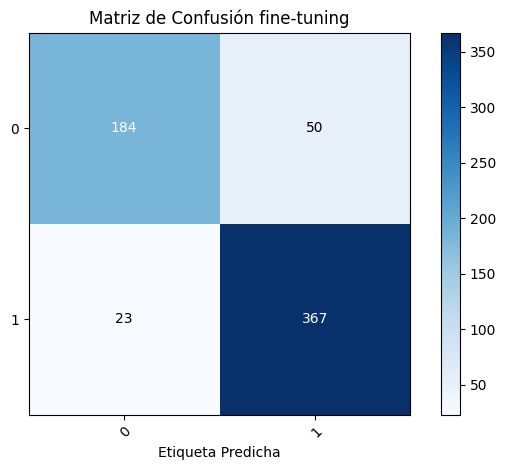

Precisión (Accuracy): 0.8830128205128205
Precisión: 0.8800959232613909
Recall: 0.941025641025641
Puntuación F1: 0.9095415117719949


In [ ]:
# Obtén las predicciones del modelo para tus datos de prueba
y_preddos = ypredictdos  # Etiquetas predichas por el modelo

# Calcula la matriz de confusión
cm = confusion_matrix(y_true, y_preddos)

# Obtiene las clases únicas
classes = unique_labels(y_true, y_preddos)

# Visualiza la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Matriz de Confusión fine-tuning',
       xlabel='Etiqueta Predicha')

# Rota las etiquetas en el eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Itera sobre los datos de la matriz y agrega anotaciones
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Ajusta el espaciado para evitar recortar las etiquetas
fig.tight_layout()
plt.show()

#Precision, Recall, F1
precision = precision_score(y_true, y_preddos)
recall = recall_score(y_true, y_preddos)
f1 = f1_score(y_true, y_preddos)
accuracy = accuracy_score(y_true, y_preddos)

print("Precisión (Accuracy):", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)